<a href="https://colab.research.google.com/github/Disha-16/Deforestation_analysis/blob/main/Deforestation_analysis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Loading the dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/deforestation dataset/goal15.forest_shares.csv')

In [3]:
df.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


Check the data types

In [4]:
df.dtypes

iso3c            object
forests_2000    float64
forests_2020    float64
trend           float64
dtype: object

Check for missing values

In [5]:
df.isnull().sum()

iso3c            0
forests_2000     0
forests_2020     0
trend           10
dtype: int64

Handling missing values

In [6]:
for column in df.columns:
    if df[column].dtype != 'object':
        df[column] = df[column].fillna(df[column].mean())

In [7]:
df.dtypes

iso3c            object
forests_2000    float64
forests_2020    float64
trend           float64
dtype: object

In [8]:
df.isnull().sum()

iso3c           0
forests_2000    0
forests_2020    0
trend           0
dtype: int64

Exploratory Data Analysis

Summary statistics

In [9]:
df.describe()

,forests_2000,forests_2020,trend
count,237.000000,237.000000,237.000000
mean,32.255274,31.585654,0.104846
std,25.366225,24.744673,16.502283
min,0.000000,0.000000,-100.000000
25%,9.900000,10.400000,-5.000000
50%,30.300000,30.300000,0.000000
75%,50.900000,49.800000,3.700000
max,98.300000,97.400000,86.200000


Distribution of forest covers in 2000 and 2020

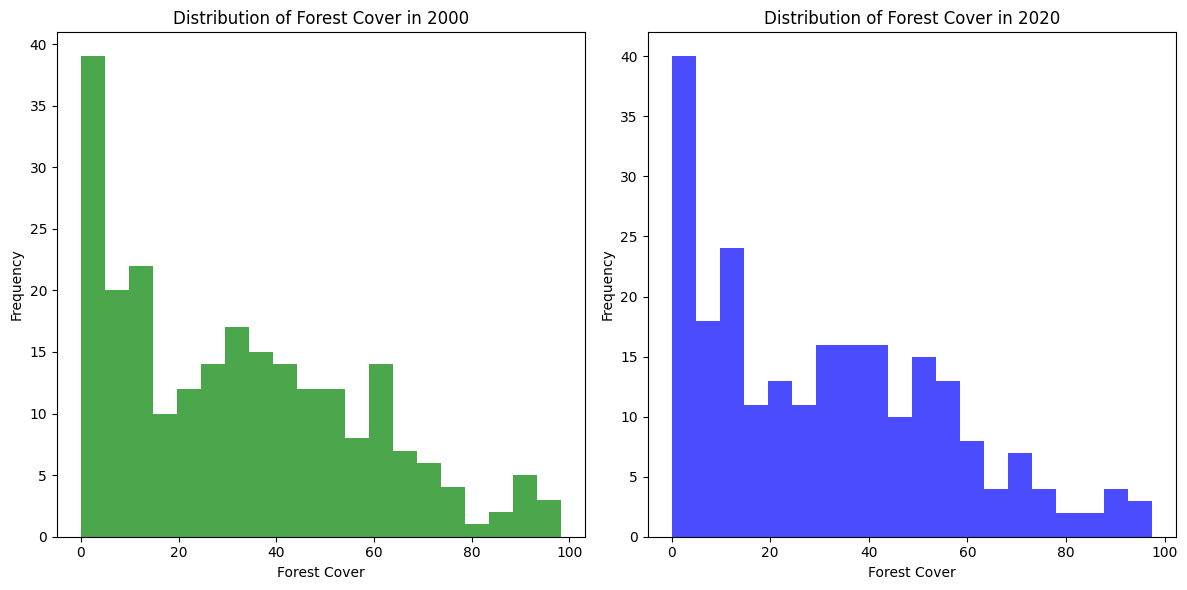

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(df['forests_2000'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Forest Cover in 2000')
plt.xlabel('Forest Cover')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df['forests_2020'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Forest Cover in 2020')
plt.xlabel('Forest Cover')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Overall trend of deforestation

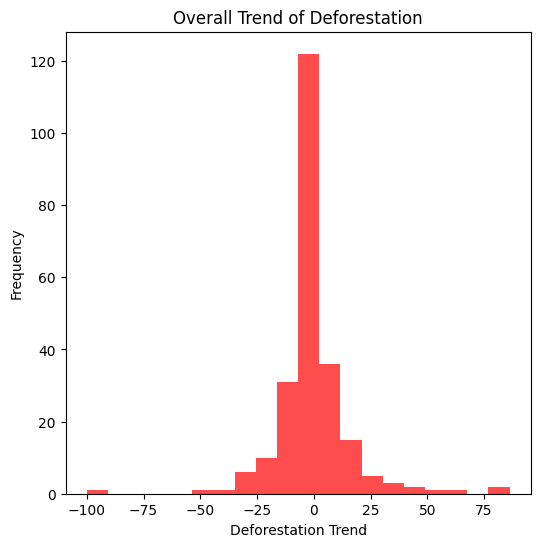

In [11]:
plt.figure(figsize=(6,6))
plt.hist(df['trend'], bins=20, color='red', alpha=0.7)
plt.title('Overall Trend of Deforestation')
plt.xlabel('Deforestation Trend')
plt.ylabel('Frequency')
plt.show()

Country wise analysis

In [12]:
df['forest_change'] = df['forests_2020'] - df['forests_2000']

In [13]:
df.head()

,iso3c,forests_2000,forests_2020,trend,forest_change
0,AFG,1.9,1.9,0.0,0.0
1,ALB,28.1,28.8,2.5,0.7
2,DZA,0.7,0.8,14.3,0.1
3,ASM,88.7,85.7,-3.4,-3.0
4,AND,34.0,34.0,0.0,0.0


Deforestation analysis

In [14]:
df_sorted = df.sort_values(by='forest_change', ascending=True)

In [15]:
df_sorted.head(10)

,iso3c,forests_2000,forests_2020,trend,forest_change
161,PRY,57.9,40.5,-30.1,-17.4
148,NIC,44.9,28.3,-37.0,-16.6
154,MNP,69.5,53.0,-23.7,-16.5
35,KHM,61.1,45.7,-25.2,-15.4
76,GMB,35.3,24.0,-32.0,-11.3
141,MMR,53.4,43.7,-18.2,-9.7
223,TZA,60.6,51.6,-14.9,-9.0
21,BEN,36.7,27.8,-24.3,-8.9
123,MWI,32.7,23.8,-27.2,-8.9
5,AGO,62.3,53.4,-14.3,-8.9


data visualization

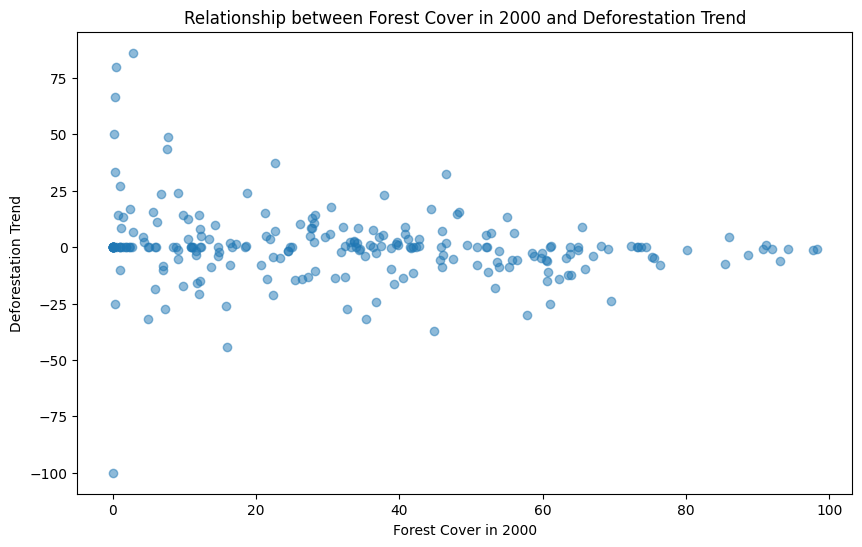

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df['forests_2000'], df['trend'], alpha=0.5)
plt.title('Relationship between Forest Cover in 2000 and Deforestation Trend')
plt.xlabel('Forest Cover in 2000')
plt.ylabel('Deforestation Trend')
plt.show()